In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
# Adding FEATURE names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Adding TARGET variable to dataframe
data["Price"] = boston.target
# MEDV - Median value of owner-occupied homes in $1000s , now renamed as "Price"

In [6]:
data.head()
# PRICE is our target variable storing information of the house price indicating REGRESSION problem

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Checking Shape
data.shape

(506, 14)

In [8]:
# Checking if any Null Values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

This dataset has no null values

In [9]:
# Checking Data Type
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

All are numeric so no need for conversion

In [10]:
# Statistical summary of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Checking if any duplicate rows
data.duplicated().sum()

0

No duplicates

In [12]:
# Checking no.of unique values in each column
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [13]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# EDA

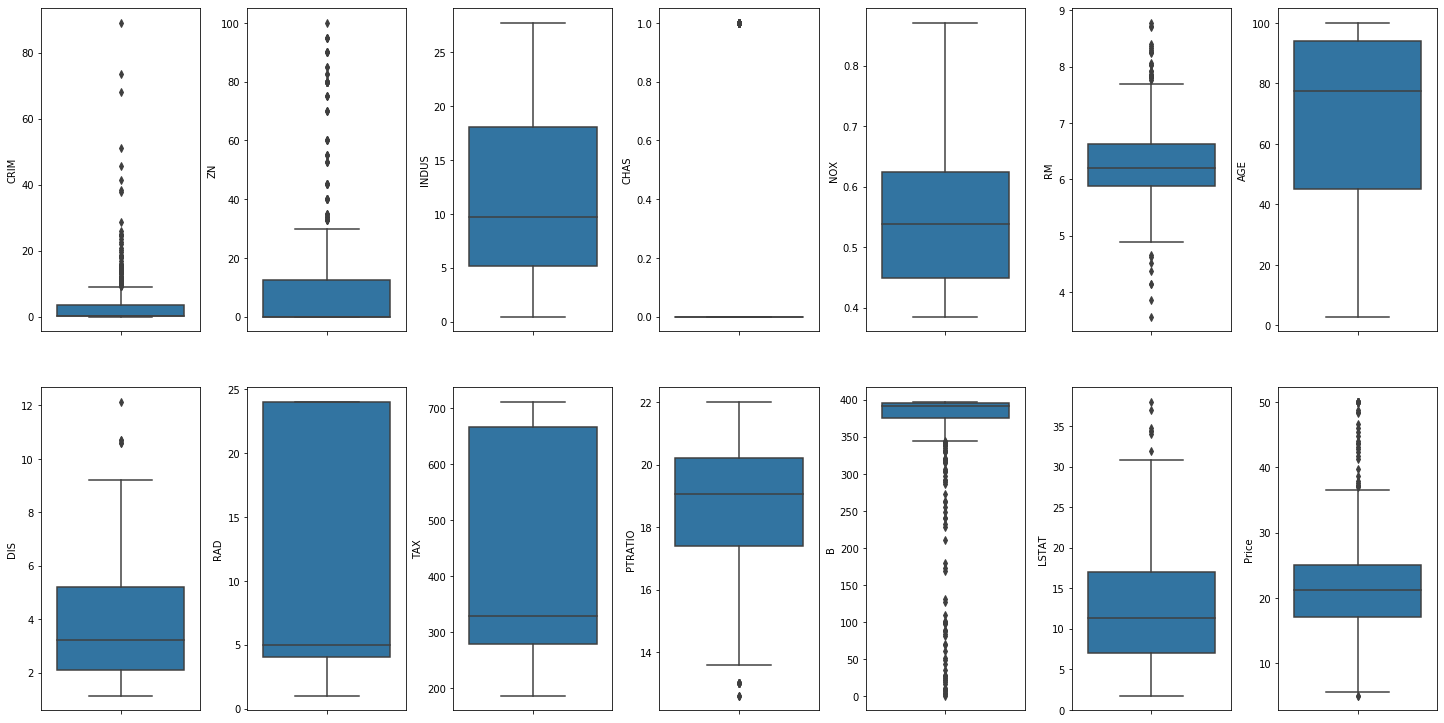

In [14]:
# Checking if any outliers
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
index = 0
axs = axs.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)    
plt.show()

Outliers are present,but when I treated it using IQR there was loss of data from 506 to 268....so
kept as it is

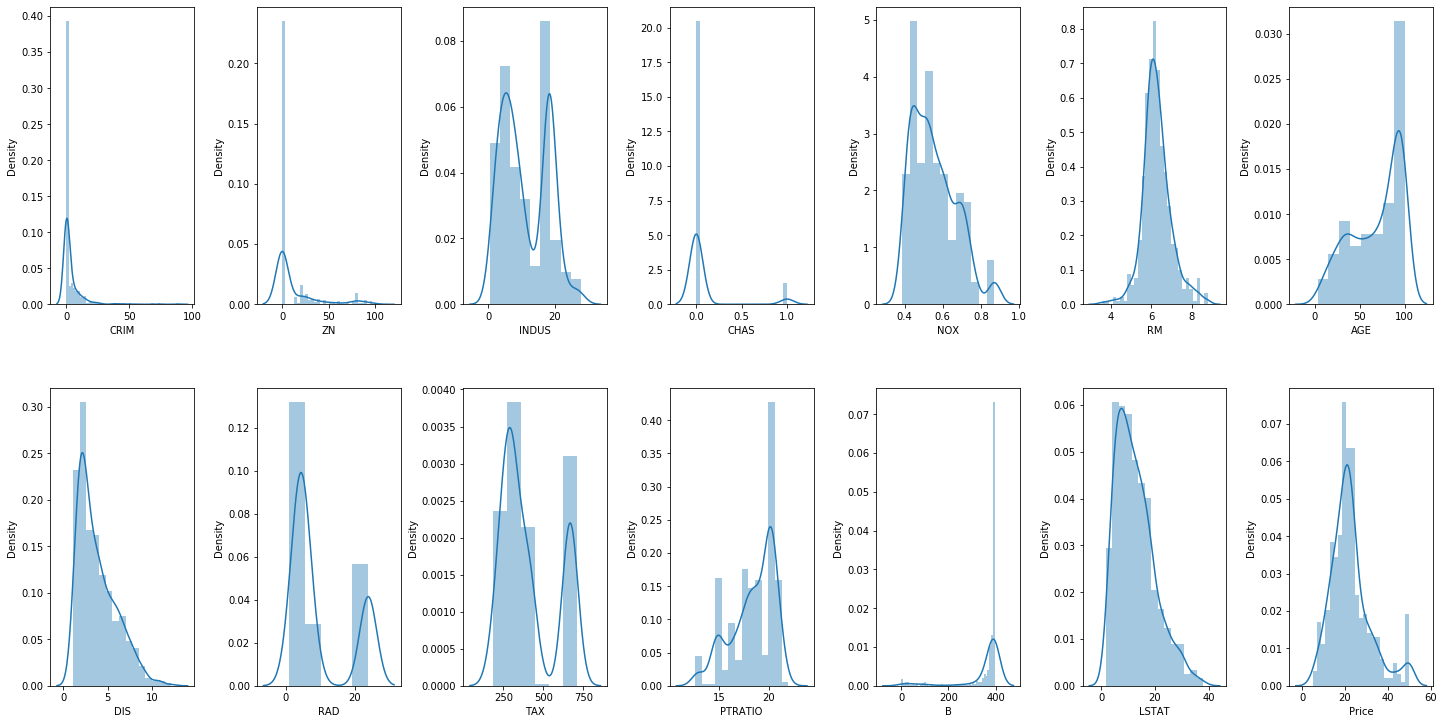

In [15]:
# Distribution of data
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
index = 0
axs = axs.flatten()

for col, value in data.items():
    sns.distplot(value, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Variables like CRIM,ZN,B are highly skewed indicating there are extreme outliers present whereas
remaining are kinda normally distributed

In [16]:
# Checking Co-relation
data_corr = data.corr()
data_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


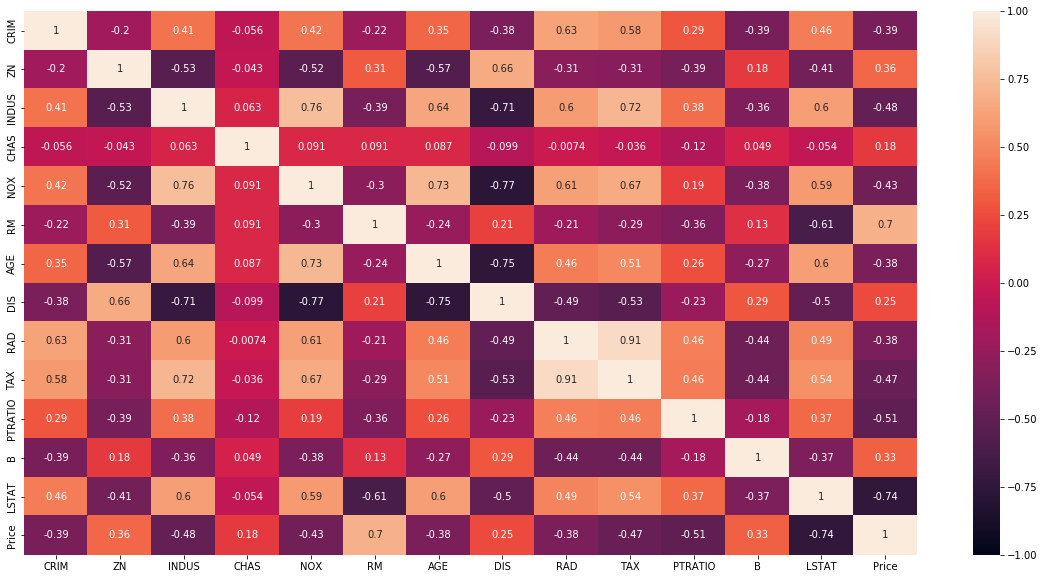

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr, vmax=1.0, vmin=-1.0, annot=True) 
plt.show()

There's no high corelation between variables,so no need to drop any variable

In [18]:
# Creating X independent and Y dependent variable

X = data.iloc[ : , 0:-1]
Y = data.iloc[ : , -1]

In [19]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [20]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

# Building the model

PREDICTING USING LINEAR REGRESSION:

In [23]:
from sklearn.linear_model import LinearRegression

#call model
lr = LinearRegression()  

#fit the model on train data
lr.fit(X_train,Y_train)

#predict
Y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_1 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_1)

adjusted_r_squared_1 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_1)

R-squared: 0.6687594935356322
RMSE: 4.928602182665334
Adj R-square: 0.6600072037306794


PREDICTING USING SVM:

In [26]:
from sklearn.svm import SVR

#create a model
svr = SVR()

#fit the model on the data and predict the values
svr.fit(X_train,Y_train)

Y_pred = svr.predict(X_test) 

In [27]:
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_2 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_2)

adjusted_r_squared_2 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_2)

R-squared: 0.6499766059760036
RMSE: 5.066412900504265
Adj R-square: 0.6407280203615484


 PREDICTING USING DECISON TREE REGRESSOR:

In [28]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor()    

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)

In [29]:
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_3 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_3)

adjusted_r_squared_3 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_3)

R-squared: 0.8465036153442909
RMSE: 3.3550664059352533
Adj R-square: 0.8424478165627376


PREDICTING USING RANDOM FOREST REGRESSOR:

In [30]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest = RandomForestRegressor(n_estimators=20)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [31]:
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_4 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_4)

adjusted_r_squared_4 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_4)                     

R-squared: 0.8804777685777014
RMSE: 2.960577207566252
Adj R-square: 0.8773196608368683


PREDICTING USING ADABOOST REGRESSOR:

In [32]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost = AdaBoostRegressor(n_estimators=20)

# fit the model on the data and predict the values
model_AdaBoost.fit(X_train, Y_train)

Y_pred = model_AdaBoost.predict(X_test)

In [33]:
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_5 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_5)

adjusted_r_squared_5 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_5)

R-squared: 0.826877360378749
RMSE: 3.563107929059623
Adj R-square: 0.8223029816895696


PREDICTING USING XGB REGRESSOR:

In [34]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20)  

#fit the model on the data and predict the values
model_xgb.fit(X_train,Y_train)

Y_pred = model_xgb.predict(X_test)

In [35]:
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse_6 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse_6)

adjusted_r_squared_6 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared_6)

R-squared: 0.9038144327438413
RMSE: 2.655871143771061
Adj R-square: 0.9012729441781299


# SELECTING THE MODEL

In [36]:
scores = pd.DataFrame({"MODEL": ["LinearRegression","SVM","DecisionTree","RandomForest",
                                 "AdaBoost", "XGBoost"],
                       
                      "Adjusted_R_square":[adjusted_r_squared_1 *100,
                                  adjusted_r_squared_2 *100,
                                  adjusted_r_squared_3 *100,           
                                  adjusted_r_squared_4 *100,
                                  adjusted_r_squared_5 *100,
                                  adjusted_r_squared_6 *100],
                       
                       "RMSE": [rmse_1, rmse_2, rmse_3,
                               rmse_4, rmse_5, rmse_6,]})

In [37]:
scores.sort_values(by=["Adjusted_R_square","RMSE"], 
                   ascending=[False,True])

,MODEL,Adjusted_R_square,RMSE
5,XGBoost,90.127294,2.655871
3,RandomForest,87.731966,2.960577
2,DecisionTree,84.244782,3.355066
4,AdaBoost,82.230298,3.563108
0,LinearRegression,66.000720,4.928602
1,SVM,64.072802,5.066413


XGBoost is the best model among all with highest Adj_R_square and lowest RMSE

# TRAINING THE DATASET WITH XGBOOST AND COMPARING WITH Y_TEST

In [38]:
#fit the model on the data and predict the values
model_xgb.fit(X_train,Y_train)

Y_pred = model_xgb.predict(X_test)

In [40]:
compare = pd.DataFrame({"Y_test/actual":Y_test, "Y_pred":Y_pred})
compare.sample(20)

,Y_test/actual,Y_pred
436,9.6,11.649275
68,17.4,18.806149
398,5.0,6.529232
454,14.9,12.741116
323,18.5,20.794630
444,10.8,10.428634
9,18.9,19.498753
0,24.0,27.515587
390,15.1,14.810112
124,18.8,18.921999


In [41]:
compare.shape

(102, 2)